Task-4

Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.
Sample Dataset :- https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

In [1]:
pip install textblob 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import urllib.request
url = 'https://raw.githubusercontent.com/Himanshu09311/Project-Task-4/main/twitter_training.csv'
urllib.request.urlretrieve(url, 'twitter_dataset.csv')

print("File downloaded successfully")

File downloaded successfully


In [4]:
import pandas as pd

In [5]:
column_names = ['tweet_id', 'entity', 'sentiment', 'text']
df = pd.read_csv('twitter_dataset.csv', names=column_names)

In [6]:
df

,tweet_id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [7]:
df.head()

,tweet_id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
df.tail()

,tweet_id,entity,sentiment,text
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [9]:
df.shape

(74682, 4)

In [10]:
df.columns

Index(['tweet_id', 'entity', 'sentiment', 'text'], dtype='object')

In [11]:
df.describe()

,tweet_id
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [12]:
df.isnull().sum()

tweet_id       0
entity         0
sentiment      0
text         686
dtype: int64

In [13]:
import matplotlib.pyplot as plt

In [14]:
from textblob import TextBlob

In [15]:
from wordcloud import WordCloud

In [16]:
df.dropna(subset=['text'], inplace=True)

In [17]:
df['sentiment'] = df['text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

In [18]:
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

(-0.5, 399.5, 199.5, -0.5)

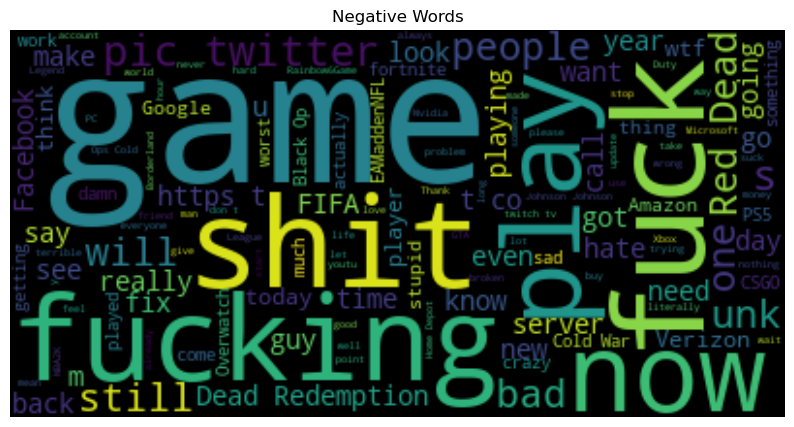

In [19]:
negative_text=' '.join(df[df['sentiment_label'] == 'negative']['text'])
wordcloud_negative = WordCloud().generate(negative_text)
plt.figure(figsize=(10,9))
plt.subplot()
plt.title('Negative Words')
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

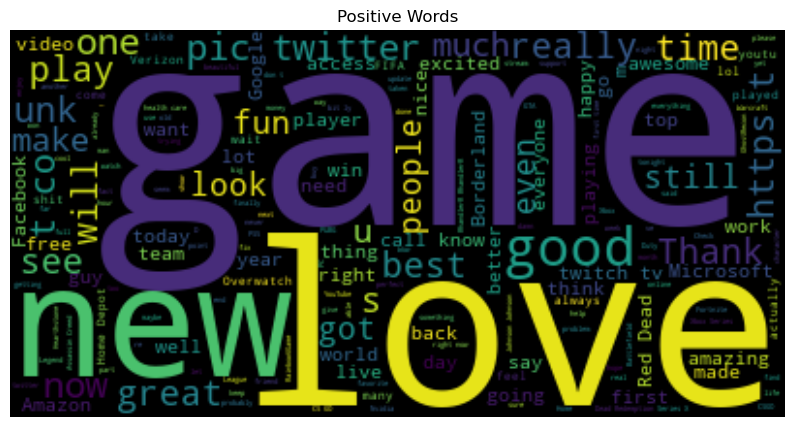

In [20]:
positive_text=' '.join(df[df['sentiment_label'] == 'positive']['text'])
wordcloud_positive = WordCloud().generate(positive_text)
plt.figure(figsize=(10,7))
plt.subplot()
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Words')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

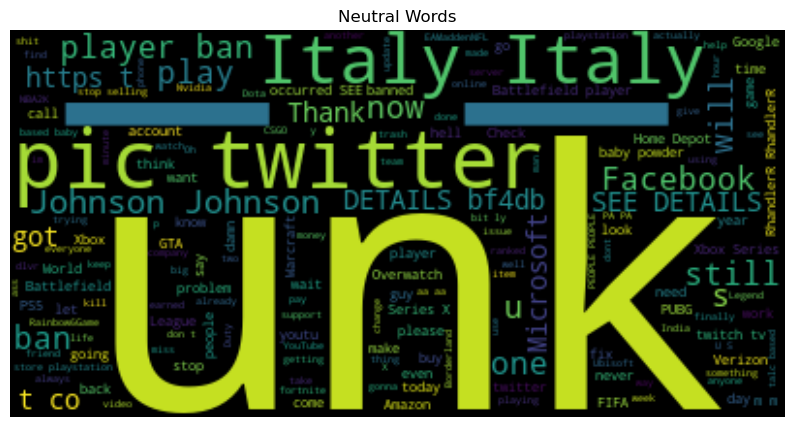

In [21]:
neutral_text=' '.join(df[df['sentiment_label'] == 'neutral']['text'])
wordcloud_Neutral = WordCloud().generate(neutral_text)
plt.figure(figsize=(10,7))
plt.subplot()
plt.imshow(wordcloud_Neutral, interpolation='bilinear')
plt.title('Neutral Words')
plt.axis('off')